In [252]:
#1. Data pre-processing - Understand the data and treat missing values, outliers (8 points)

In [253]:
import numpy as np
import pandas as pd

In [254]:
Missing_Values = ["inf","missing"]
bpl_df=pd.read_excel('Bank_Personal_Loan_Modelling-1.xlsx',sheet_name=1, na_values = Missing_Values).rename(columns=lambda x: x.strip())

In [255]:
bpl_df.head()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1


In [256]:
bpl_df.shape

(5000, 14)

In [257]:
bpl_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [258]:
missing_values=bpl_df.columns[bpl_df.isnull().any()]

In [259]:
missing_values

Index(['Family members'], dtype='object')

In [260]:
bpl_df[missing_values].isnull().sum()

Family members    18
dtype: int64

In [261]:
#replacing missing values of family members with median values
bpl_df['Family members'] = bpl_df['Family members'].fillna(bpl_df['Family members'].median()).astype(int)
#bpl_df['Family members'] = bpl_df['Family members'].fillna(lambda x: random.choice(bpl_df[bpl_df[column] != np.nan]['Family members']),\
#                                                                                  inplace = True)

In [262]:
bpl_df.dtypes

ID                         int64
Age (in years)             int64
Experience (in years)      int64
Income (in K/month)        int64
ZIP Code                   int64
Family members             int32
CCAvg                    float64
Education                  int64
Mortgage                   int64
Personal Loan              int64
Securities Account         int64
CD Account                 int64
Online                     int64
CreditCard                 int64
dtype: object

In [263]:
#dropping the ID and ZIP code columns as they are just placeholders
bpl_df_new=bpl_df.drop('ID',axis=1)
bpl_df_new=bpl_df_new.drop('ZIP Code',axis=1)
bpl_df_new.head()

,Age (in years),Experience (in years),Income (in K/month),Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [264]:
#checking for outliers
bpl_df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Age (in years),5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience (in years),5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income (in K/month),5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family members,5000.0,2.395800,1.145340,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [265]:
print("Income, CCAvg,Mortgage columns may have outliers seeing the description")

Income, CCAvg,Mortgage columns may have outliers seeing the description


In [266]:
#visualizing outliers
import matplotlib.pyplot as plt

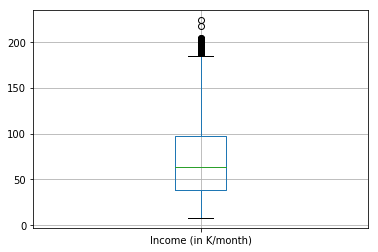

In [267]:
bpl_df_new[['Income (in K/month)']].boxplot()

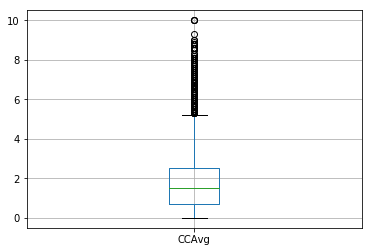

In [268]:
bpl_df_new[['CCAvg']].boxplot()

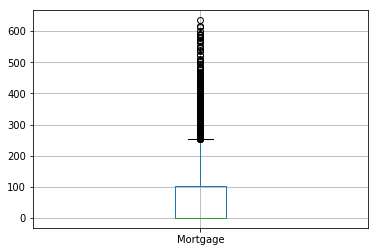

In [269]:
bpl_df_new[['Mortgage']].boxplot()

In [270]:
print("I wouldn't want to remove outliers as that will remove most of the available data. \
\nMoreover I feel outliers may be the people who'll avail personal loan")

I wouldn't want to remove outliers as that will remove most of the available data. 
Moreover I feel outliers may be the people who'll avail personal loan


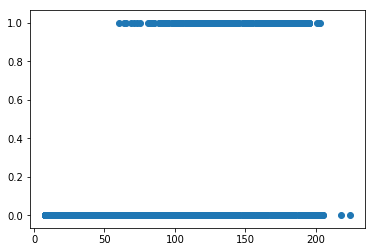

In [271]:
plt.scatter(bpl_df_new['Income (in K/month)'],bpl_df_new['Personal Loan'])
plt.show()

In [272]:
print("From the boxplot for income, the outliers lie in the higher income end. However , from the scatter plot, we see those who have availed personal loan are from the higher income group (>157). We shouldn't loose this data")

From the boxplot for income, the outliers lie in the higher income end. However , from the scatter plot, we see those who have availed personal loan are from the higher income group (>157). We shouldn't loose this data


In [273]:
q3 = bpl_df_new[['Income (in K/month)']].quantile(0.75)['Income (in K/month)']
q1 = bpl_df_new[['Income (in K/month)']].quantile(0.25)['Income (in K/month)']
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print(outliers_above,outliers_below)

157.0 -20.0


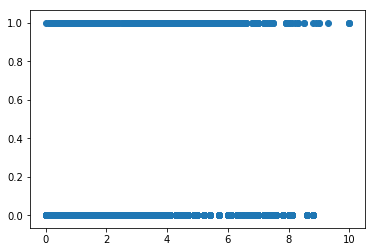

In [274]:
plt.scatter(bpl_df_new['CCAvg'],bpl_df_new['Personal Loan'])
plt.show()

In [275]:
q3 = bpl_df_new[['CCAvg']].quantile(0.75)['CCAvg']
q1 = bpl_df_new[['CCAvg']].quantile(0.25)['CCAvg']
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print(outliers_above,outliers_below)

4.3 -1.1


In [276]:
print("Again, from the box plot, we see that the outliers are towards the higher end of CCAvg. And the scatter plot reveals that personal loan availers so have high CCAvg(>4.3). Wouldn't want to remove them by treating them as outliers ")

Again, from the box plot, we see that the outliers are towards the higher end of CCAvg. And the scatter plot reveals that personal loan availers so have high CCAvg(>4.3). Wouldn't want to remove them by treating them as outliers 


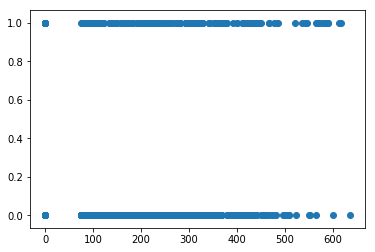

In [277]:
plt.scatter(bpl_df_new['Mortgage'],bpl_df_new['Personal Loan'])
plt.show()

In [278]:
q3 = bpl_df_new[['Mortgage']].quantile(0.75)['Mortgage']
q1 = bpl_df_new[['Mortgage']].quantile(0.25)['Mortgage']
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print(outliers_above,outliers_below)

202.0 -101.0


In [279]:
print("Same reasoning as the above two. Wouldn't so any outlier treatment here.")

Same reasoning as the above two. Wouldn't so any outlier treatment here.


In [280]:
#2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose 
#carefully which all attributes have to be a part of the analysis and why (4 points)

In [281]:
import seaborn as sns

In [282]:
corr=bpl_df_new[['Age (in years)','Experience (in years)','Income (in K/month)','Family members',\
                 'CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']].corr()
corr

,Age (in years),Experience (in years),Income (in K/month),Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age (in years),1.000000,0.994215,-0.055269,-0.045430,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience (in years),0.994215,1.000000,-0.046574,-0.051584,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income (in K/month),-0.055269,-0.046574,1.000000,-0.157364,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family members,-0.045430,-0.051584,-0.157364,1.000000,-0.110314,0.063115,-0.020221,0.061069,0.021356,0.013539,0.009232,0.009650
CCAvg,-0.052012,-0.050077,0.645984,-0.110314,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.063115,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020221,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061069,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.021356,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.013539,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


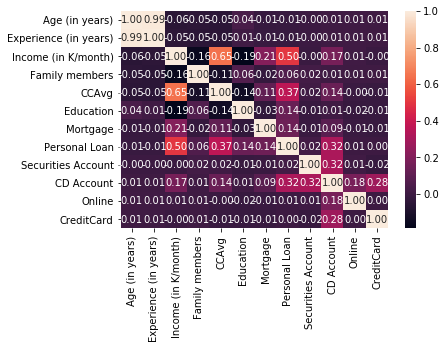

In [283]:
sns.heatmap(corr,annot=True,fmt='0.2f')

In [284]:
print("There's a high correlation between average CC spend and income. Obviously, higher the income, more is the CC spend")
print("Will not drop any columns though")

There's a high correlation between average CC spend and income. Obviously, higher the income, more is the CC spend
Will not drop any columns though


C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


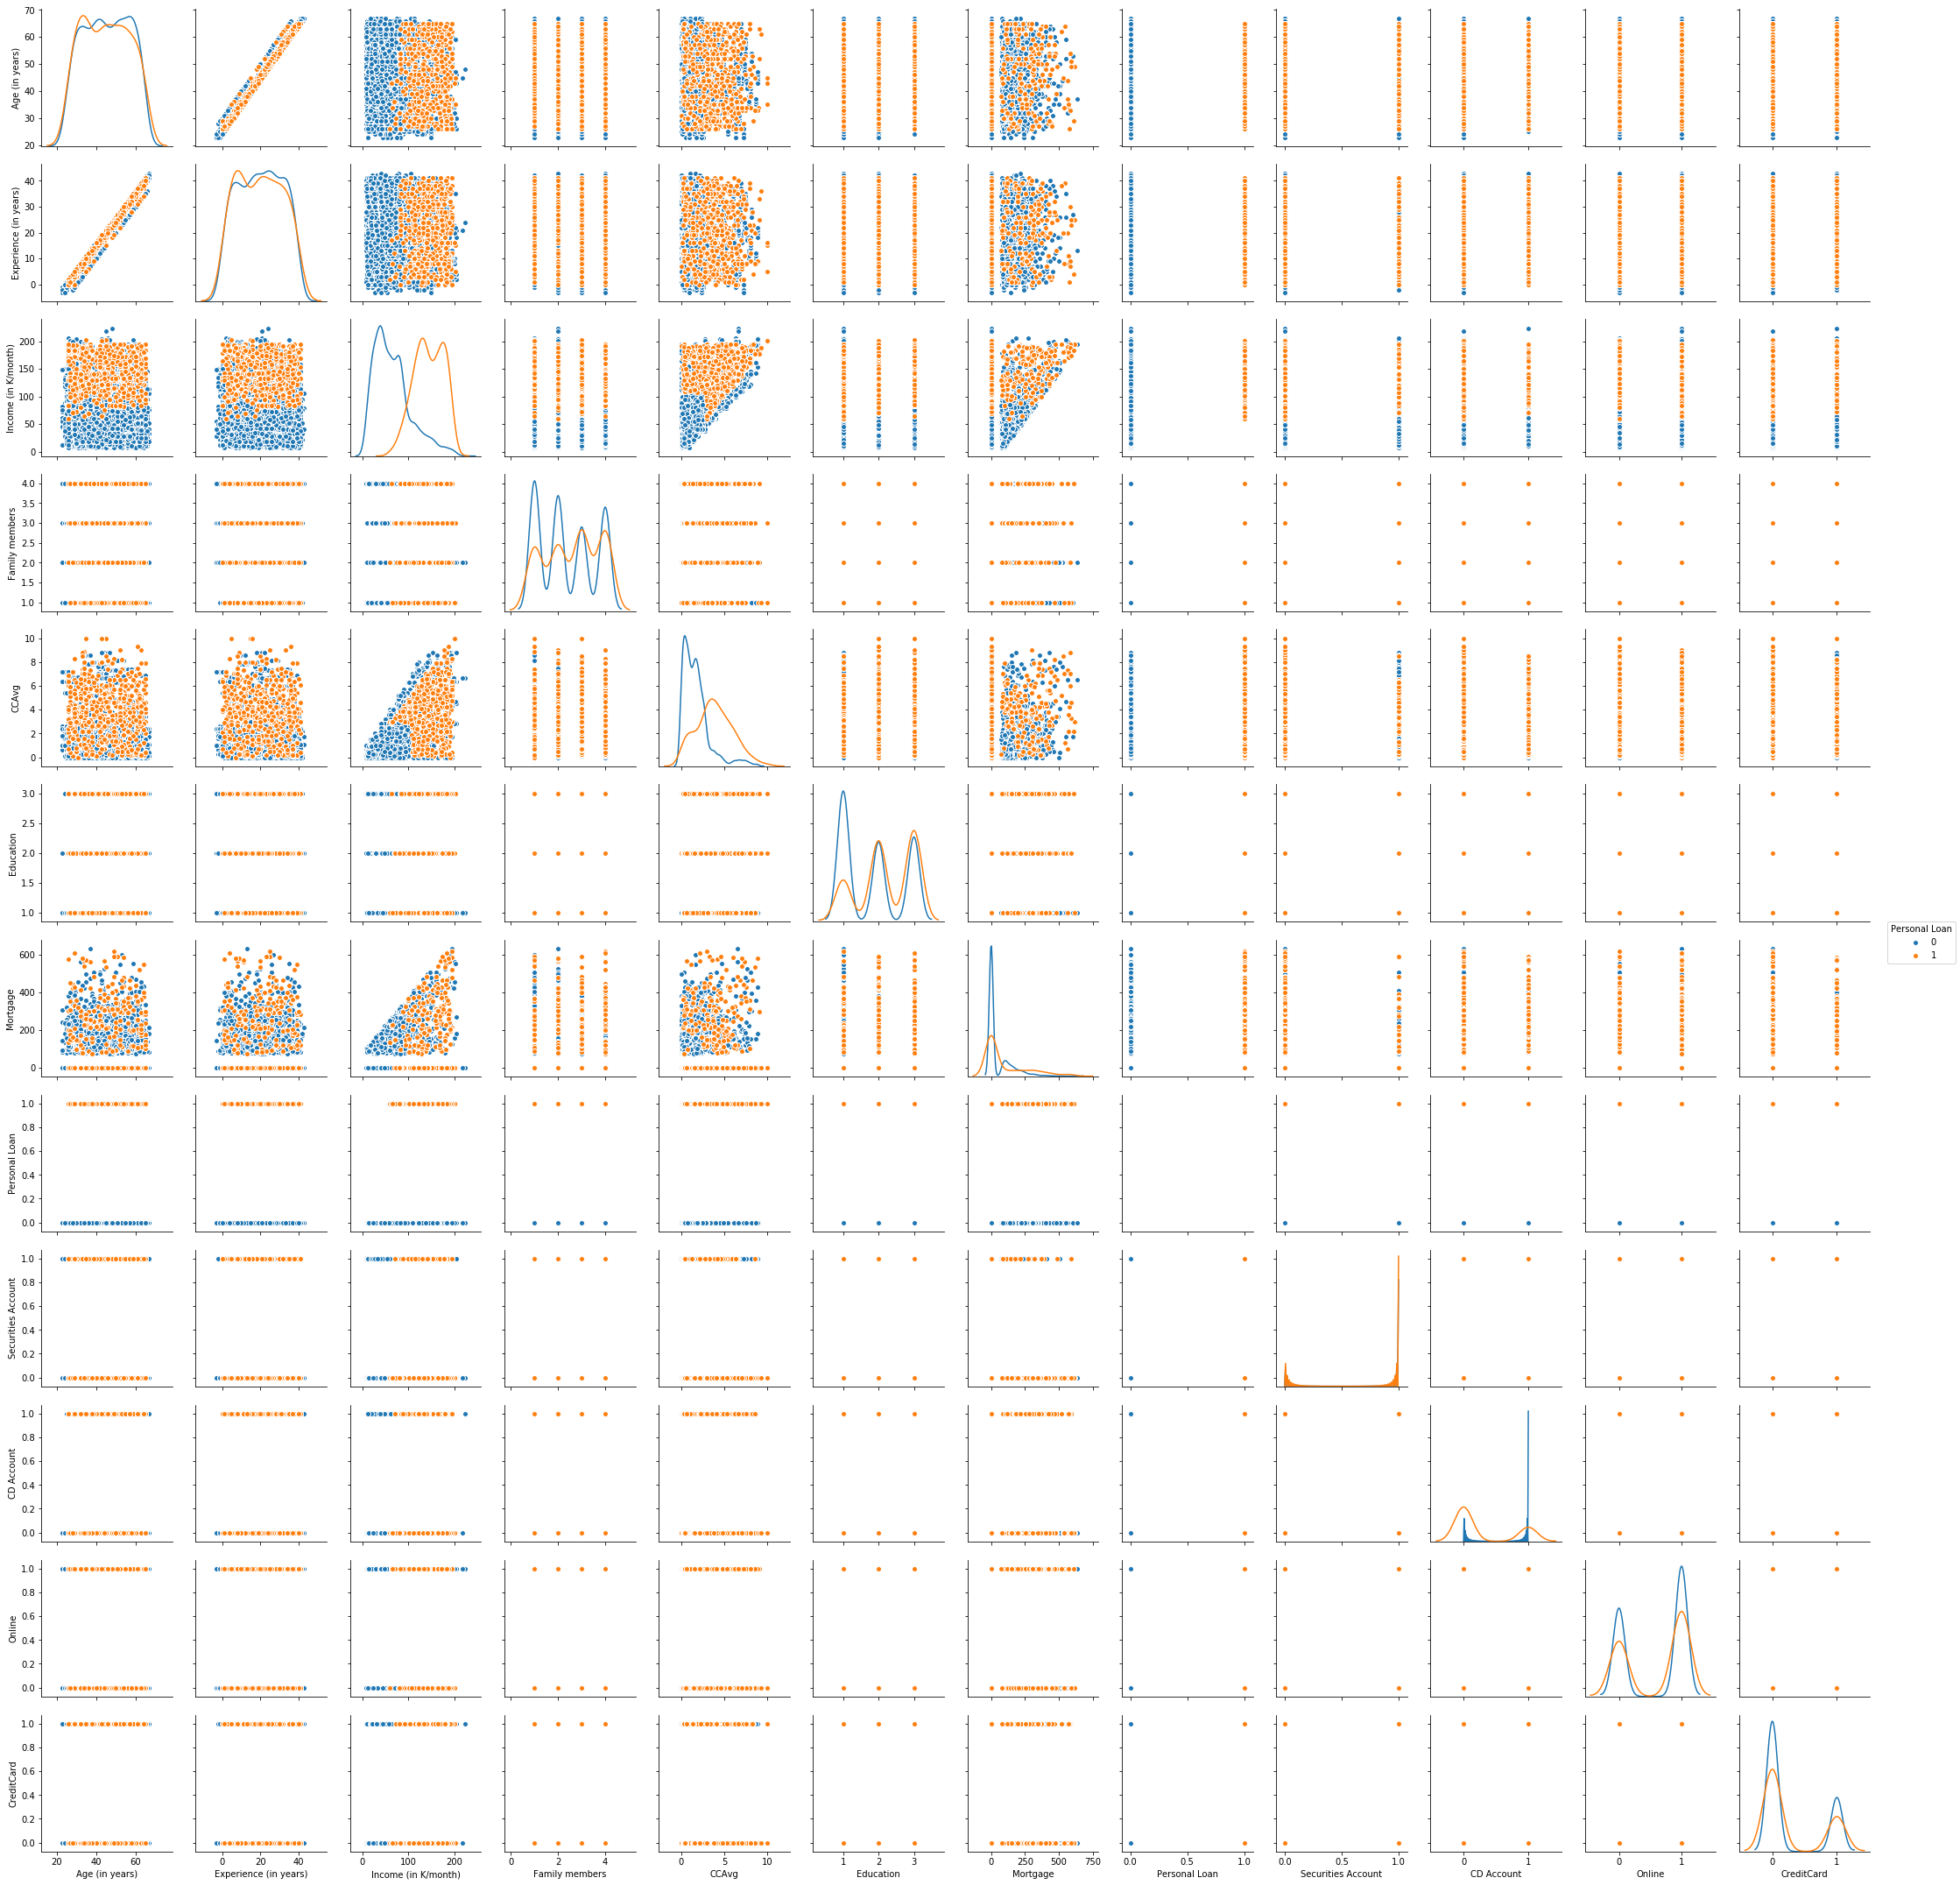

In [285]:
sns.pairplot(bpl_df_new , hue='Personal Loan' , diag_kind = 'kde')

In [286]:
print("Age and experience are highly correlated. Will drop age as \
experience level gives a better understanding of a person's financials")
bpl_df_new.drop('Age (in years)',axis=1,inplace=True)
bpl_df_new.head()

Age and experience are highly correlated. Will drop age as experience level gives a better understanding of a person's financials


,Experience (in years),Income (in K/month),Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,19,34,3,1.5,1,0,0,1,0,0,0
2,15,11,1,1.0,1,0,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,0,1


In [294]:
#Dropping first column while doing one-hot coding for categorical columns
bpl_df_new_dummies =  pd.get_dummies(bpl_df_new,columns=['Education','Securities Account','CD Account','Online','CreditCard'],drop_first=True)

In [295]:
bpl_df_new_dummies.head()

,Experience (in years),Income (in K/month),Family members,CCAvg,Mortgage,Personal Loan,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,1,49,4,1.6,0,0,0,0,1,0,0,0
1,19,34,3,1.5,0,0,0,0,1,0,0,0
2,15,11,1,1.0,0,0,0,0,0,0,0,0
3,9,100,1,2.7,0,0,1,0,0,0,0,0
4,8,45,4,1.0,0,0,1,0,0,0,0,1


In [296]:
bpl_df_new_dummies.shape

(5000, 12)

In [290]:
#couldn't figure out much about the PCA. Will like to explore this further later

from sklearn.decomposition import PCA
pca=PCA(2)
pca.fit(bpl_df_new)
print(pca.components_)
print(pca.explained_variance_)
bpl_df_pca=pca.transform(bpl_df_new)
print(bpl_df_pca)

[[-1.46213936e-03  1.15362673e-01 -3.15261807e-04  2.42974337e-03
  -3.50470944e-04  9.93319136e-01  4.79660402e-04 -1.63893936e-05
   2.26111220e-04 -2.48853432e-05 -3.23886270e-05]
 [-1.22613434e-02  9.92919368e-01 -3.96804119e-03  2.46173014e-02
  -3.42552358e-03 -1.15398665e-01  3.12714493e-03 -8.41286513e-06
   7.96627655e-04  1.75326766e-04 -5.81894412e-06]]
[10458.22732309  2008.23764444]
[[-58.95249167 -17.85677443]
 [-60.70917799 -32.96976283]
 [-63.35723888 -55.76222708]
 ...
 [-61.89533249 -43.17659873]
 [-59.01223153 -18.3613196 ]
 [-55.03621661  15.85015218]]


In [291]:
#3. Model the data using Logistic regression (4 points)

In [297]:
from sklearn.model_selection import train_test_split
X= bpl_df_new_dummies.drop('Personal Loan',axis=1)
y=bpl_df_new_dummies.pop('Personal Loan')

In [298]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=seed)

In [299]:
from sklearn.linear_model import LogisticRegression

In [300]:
model= LogisticRegression()

In [301]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [302]:
y_predict = model.predict(X_test)

In [303]:
model_score = model.score(X_test,y_test)

In [305]:
#4. Find the accuracy of the model using confusion matrix (4 points)

In [307]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predict))

[[1354    8]
 [  51   87]]


In [ ]:
##Analyzing the confusion matrix

##True Positives (TP): we correctly predicted that they will go for personal loan (0) 87 times

##True Negatives (TN): we correctly predicted that they will not take personal loan 1354 times

##False Positives (FP): we incorrectly predicted that they will take personal loan (a "Type I error") 8 Falsely predict positive Type I error

##False Negatives (FN): we incorrectly predicted that they won't take personal loan (a "Type II error") 51 Falsely predict negative Type II error

In [308]:
print(model_score)

0.9606666666666667


In [309]:
#5. Use K - NN model 
#[Hint: Try different values of k] and compare the accuracy of this model with that of Logistic regression (10 points)

In [310]:
from sklearn.neighbors import KNeighborsClassifier

In [316]:
#KNN5=KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='kd_tree')
KNN5=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [317]:
KNN5.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [318]:
KNN5.score(X_test,y_test)

0.9093333333333333

In [319]:
KNN5_predict=KNN5.predict(X_test)

In [320]:
print(metrics.confusion_matrix(y_test,KNN5_predict))

[[1322   40]
 [  96   42]]


In [321]:
##Analyzing the confusion matrix

##True Positives (TP): we correctly predicted that they will go for personal loan (0) 42 times

##True Negatives (TN): we correctly predicted that they will not take personal loan 1322 times

##False Positives (FP): we incorrectly predicted that they will take personal loan (a "Type I error") 40 Falsely predict positive Type I error

##False Negatives (FN): we incorrectly predicted that they won't take personal loan (a "Type II error") 96 Falsely predict negative Type II error

In [323]:
KNN7=KNeighborsClassifier(n_neighbors=7,weights='distance')
KNN7.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')

In [324]:
KNN7.score(X_test,y_test)

0.9113333333333333

In [326]:
KNN7_predict=KNN7.predict(X_test)
print(metrics.confusion_matrix(y_test,KNN7_predict))

[[1329   33]
 [ 100   38]]


In [ ]:
##Analyzing the confusion matrix

##True Positives (TP): we correctly predicted that they will go for personal loan (0) 38 times

##True Negatives (TN): we correctly predicted that they will not take personal loan 1329 times

##False Positives (FP): we incorrectly predicted that they will take personal loan (a "Type I error") 33 Falsely predict positive Type I error

##False Negatives (FN): we incorrectly predicted that they won't take personal loan (a "Type II error") 100 Falsely predict negative Type II error

In [327]:
KNN9=KNeighborsClassifier(n_neighbors=9,weights='distance')

In [328]:
KNN9.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')

In [329]:
KNN9.score(X_test,y_test)

0.916

In [332]:
KNN9_predict=KNN9.predict(X_test)
print(metrics.confusion_matrix(y_test,KNN9_predict))

[[1332   30]
 [  96   42]]


In [ ]:
##Analyzing the confusion matrix

##True Positives (TP): we correctly predicted that they will go for personal loan (0) 42 times

##True Negatives (TN): we correctly predicted that they will not take personal loan 1332 times

##False Positives (FP): we incorrectly predicted that they will take personal loan (a "Type I error") 30 Falsely predict positive Type I error

##False Negatives (FN): we incorrectly predicted that they won't take personal loan (a "Type II error") 96 Falsely predict negative Type II error

In [333]:
KNN11=KNeighborsClassifier(n_neighbors=11,weights='distance')

In [334]:
KNN11.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='distance')

In [335]:
KNN11.score(X_test,y_test)

0.914

In [337]:
KNN11_predict=KNN11.predict(X_test)
print(metrics.confusion_matrix(y_test,KNN11_predict))

[[1333   29]
 [ 100   38]]


In [ ]:
##Analyzing the confusion matrix

##True Positives (TP): we correctly predicted that they will go for personal loan (0) 38 times

##True Negatives (TN): we correctly predicted that they will not take personal loan 1333 times

##False Positives (FP): we incorrectly predicted that they will take personal loan (a "Type I error") 29 Falsely predict positive Type I error

##False Negatives (FN): we incorrectly predicted that they won't take personal loan (a "Type II error") 100 Falsely predict negative Type II error

In [338]:
print("Logistic regression model gave better results as compared to the KNN.")
print("Also, optimal n value would be 9")

Logistic regression model gave better results as compared to the KNN.
Also, optimal n value would be 9


In [359]:
#Trying Random Forest for the same
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=12,criterion='entropy',max_depth=9)
rfcl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [360]:
rfcl.score(X_test,y_test)

0.9906666666666667

In [361]:
rfcl_predict=rfcl.predict(X_test)

In [362]:
print(metrics.confusion_matrix(y_test,rfcl_predict))

[[1359    3]
 [  11  127]]


In [363]:
##Analyzing the confusion matrix

##True Positives (TP): we correctly predicted that they will go for personal loan (0) a whopping 127 times!!!

##True Negatives (TN): we correctly predicted that they will not take personal loan 1359 times

##False Positives (FP): we incorrectly predicted that they will take personal loan (a "Type I error") only 3 Falsely predict positive Type I error

##False Negatives (FN): we incorrectly predicted that they won't take personal loan (a "Type II error") only 11 Falsely predict negative Type II error

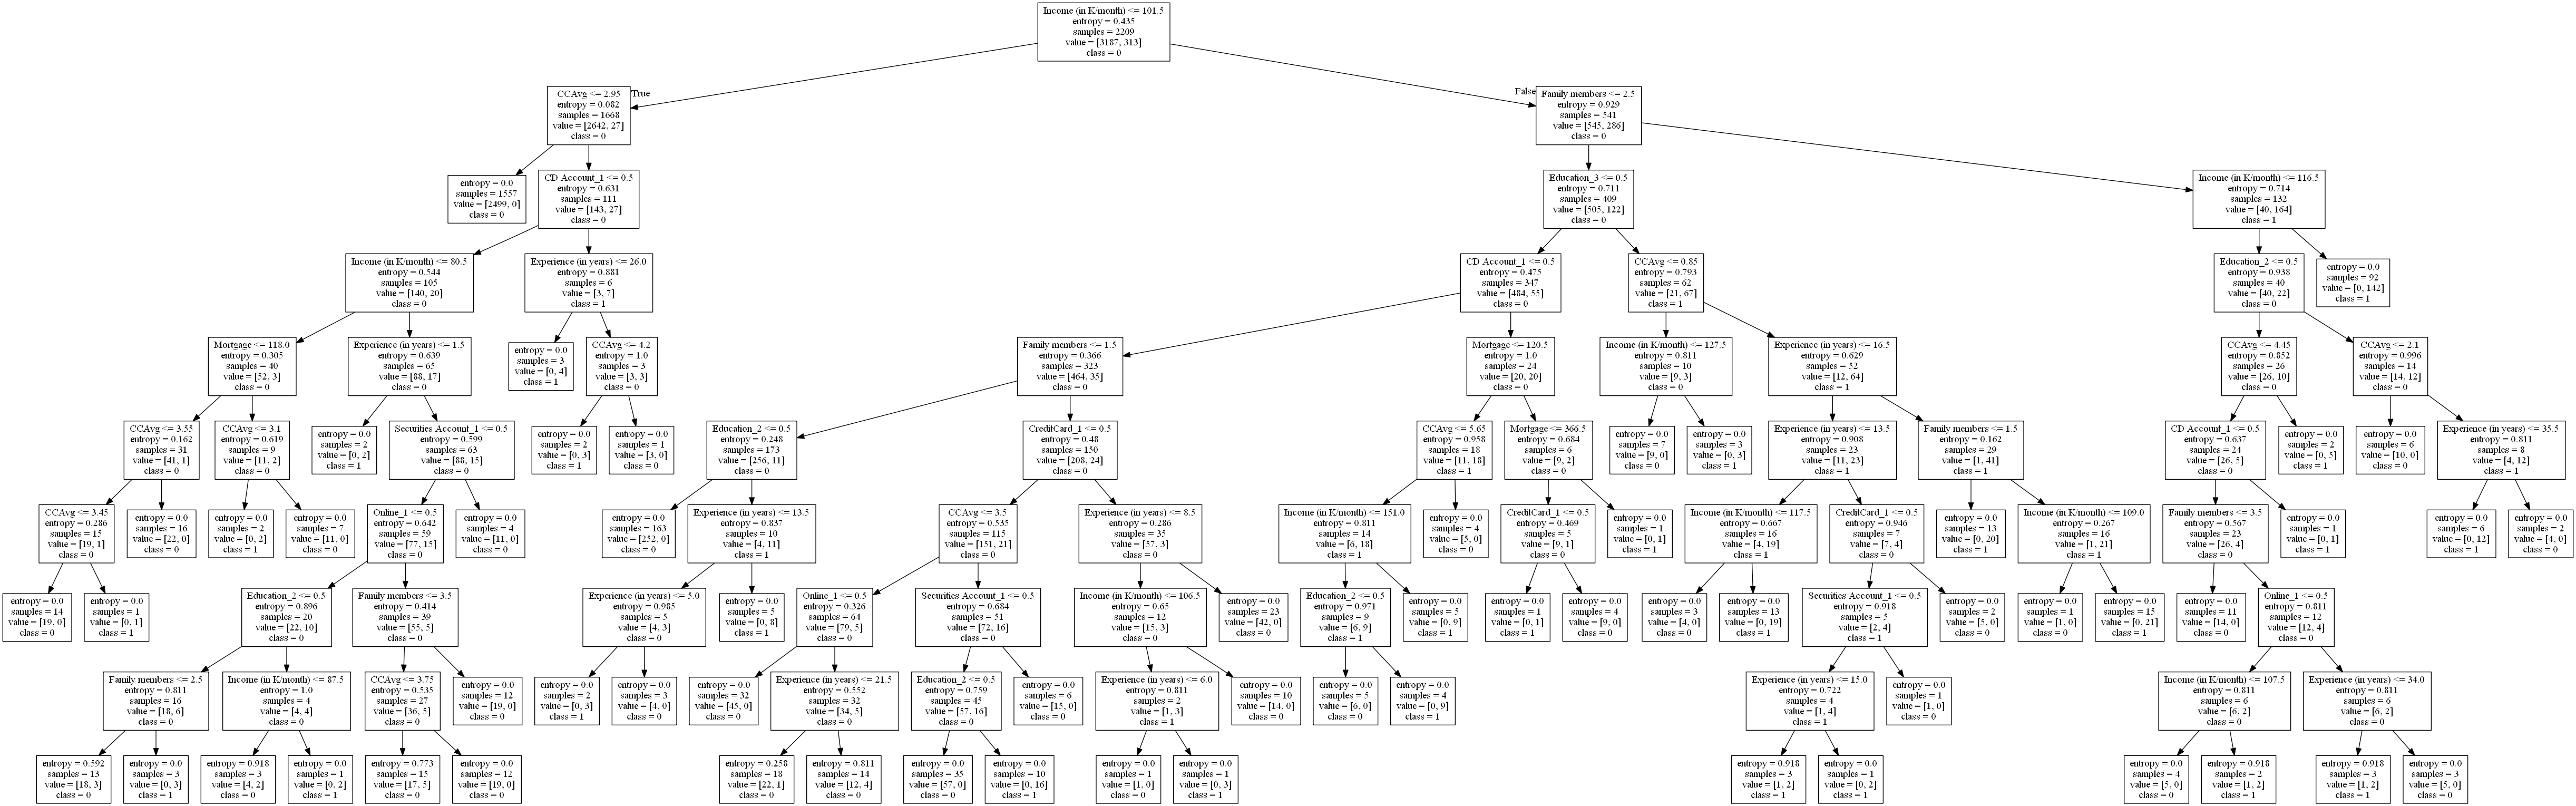

In [364]:
from sklearn import tree
from os import system
from IPython.display import Image
Credit_Tree_File = open('personal_loan.dot','w')
train_char_label = ['0', '1']
dot_data = tree.export_graphviz(rfcl.estimators_[0], out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

system("dot -Tpng  personal_loan.dot -o personal_loan.png")
Image("personal_loan.png")